## ML PIPELINE
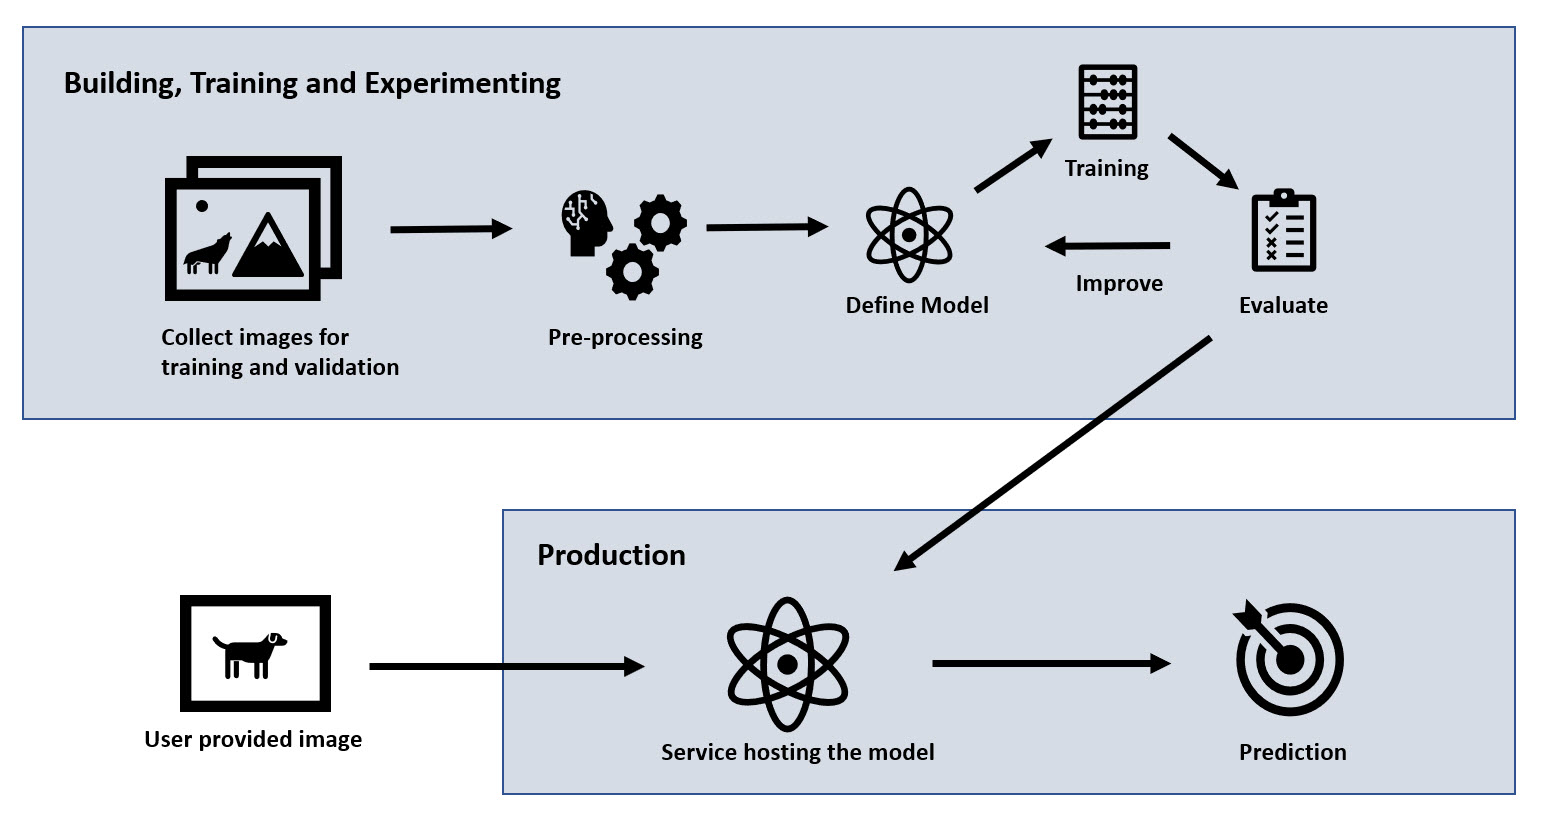

# 📘 Model Evaluation in Machine Learning

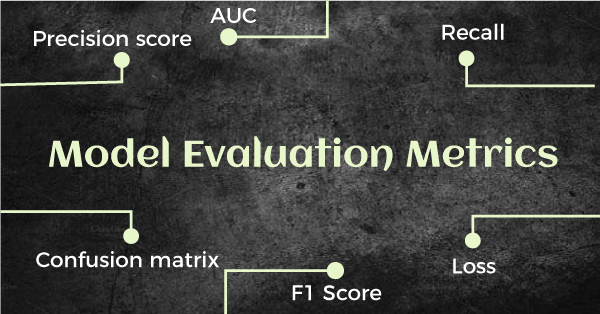![1690477969469.png](|)

## 🧠 Why Model Evaluation is Important

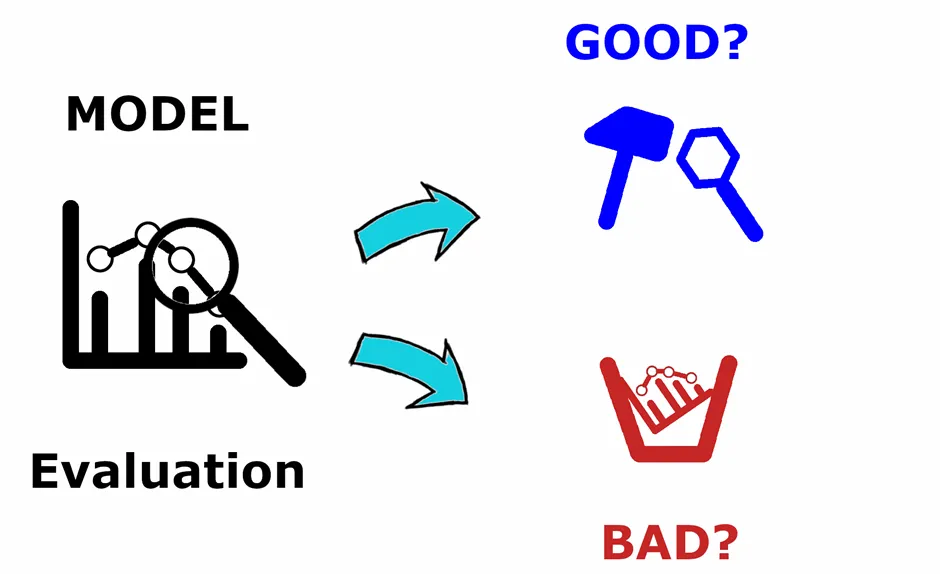

> "I believe building a model takes 25% of the time, but evaluating and improving it takes the remaining 75%."

Training a model is not the end — it's just the beginning!
Evaluation is how we measure if our model is actually doing a good job or not. We need to test on **unseen data** (test set or real-world data) and check:

- Where it's going wrong
- Why it's going wrong
- How to make it better (e.g., change model, tune hyperparameters, or use better features)

## ✅ Confusion Matrix Basics

A **confusion matrix** shows how well a classification model performs. It compares **actual values** with **predicted values**:


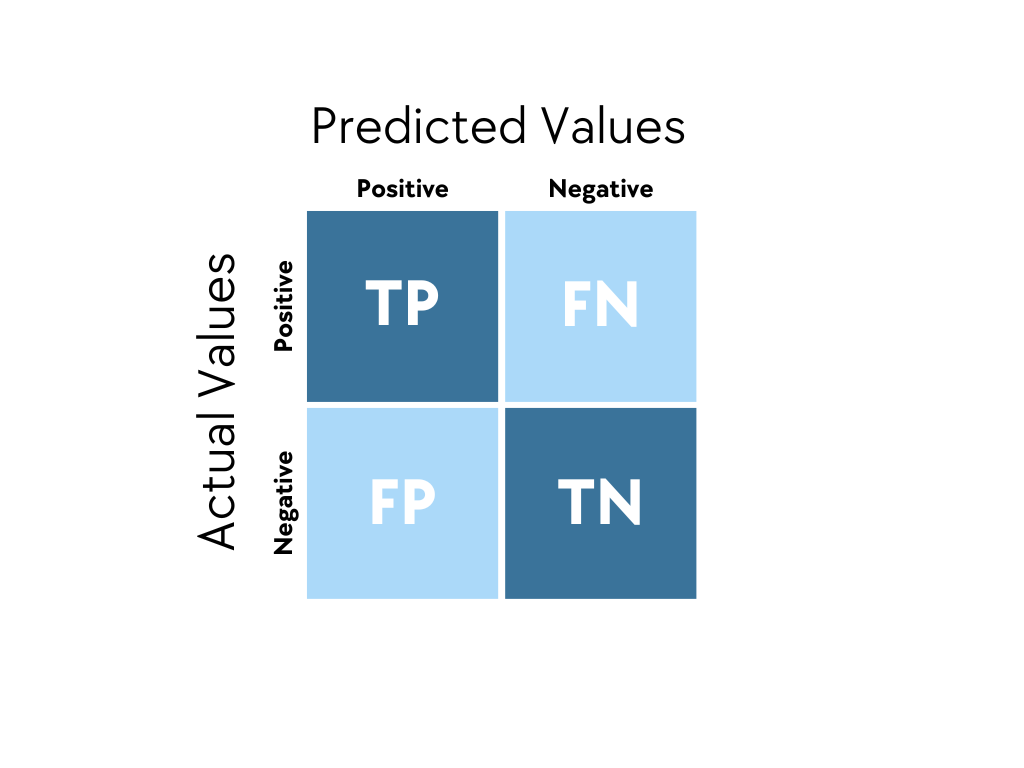


### Terminology:
- **TP (True Positive)**: Model predicted *Yes*, and it was actually *Yes*
- **TN (True Negative)**: Model predicted *No*, and it was actually *No*
- **FP (False Positive)**: Model predicted *Yes*, but it was actually *No*
- **FN (False Negative)**: Model predicted *No*, but it was actually *Yes*


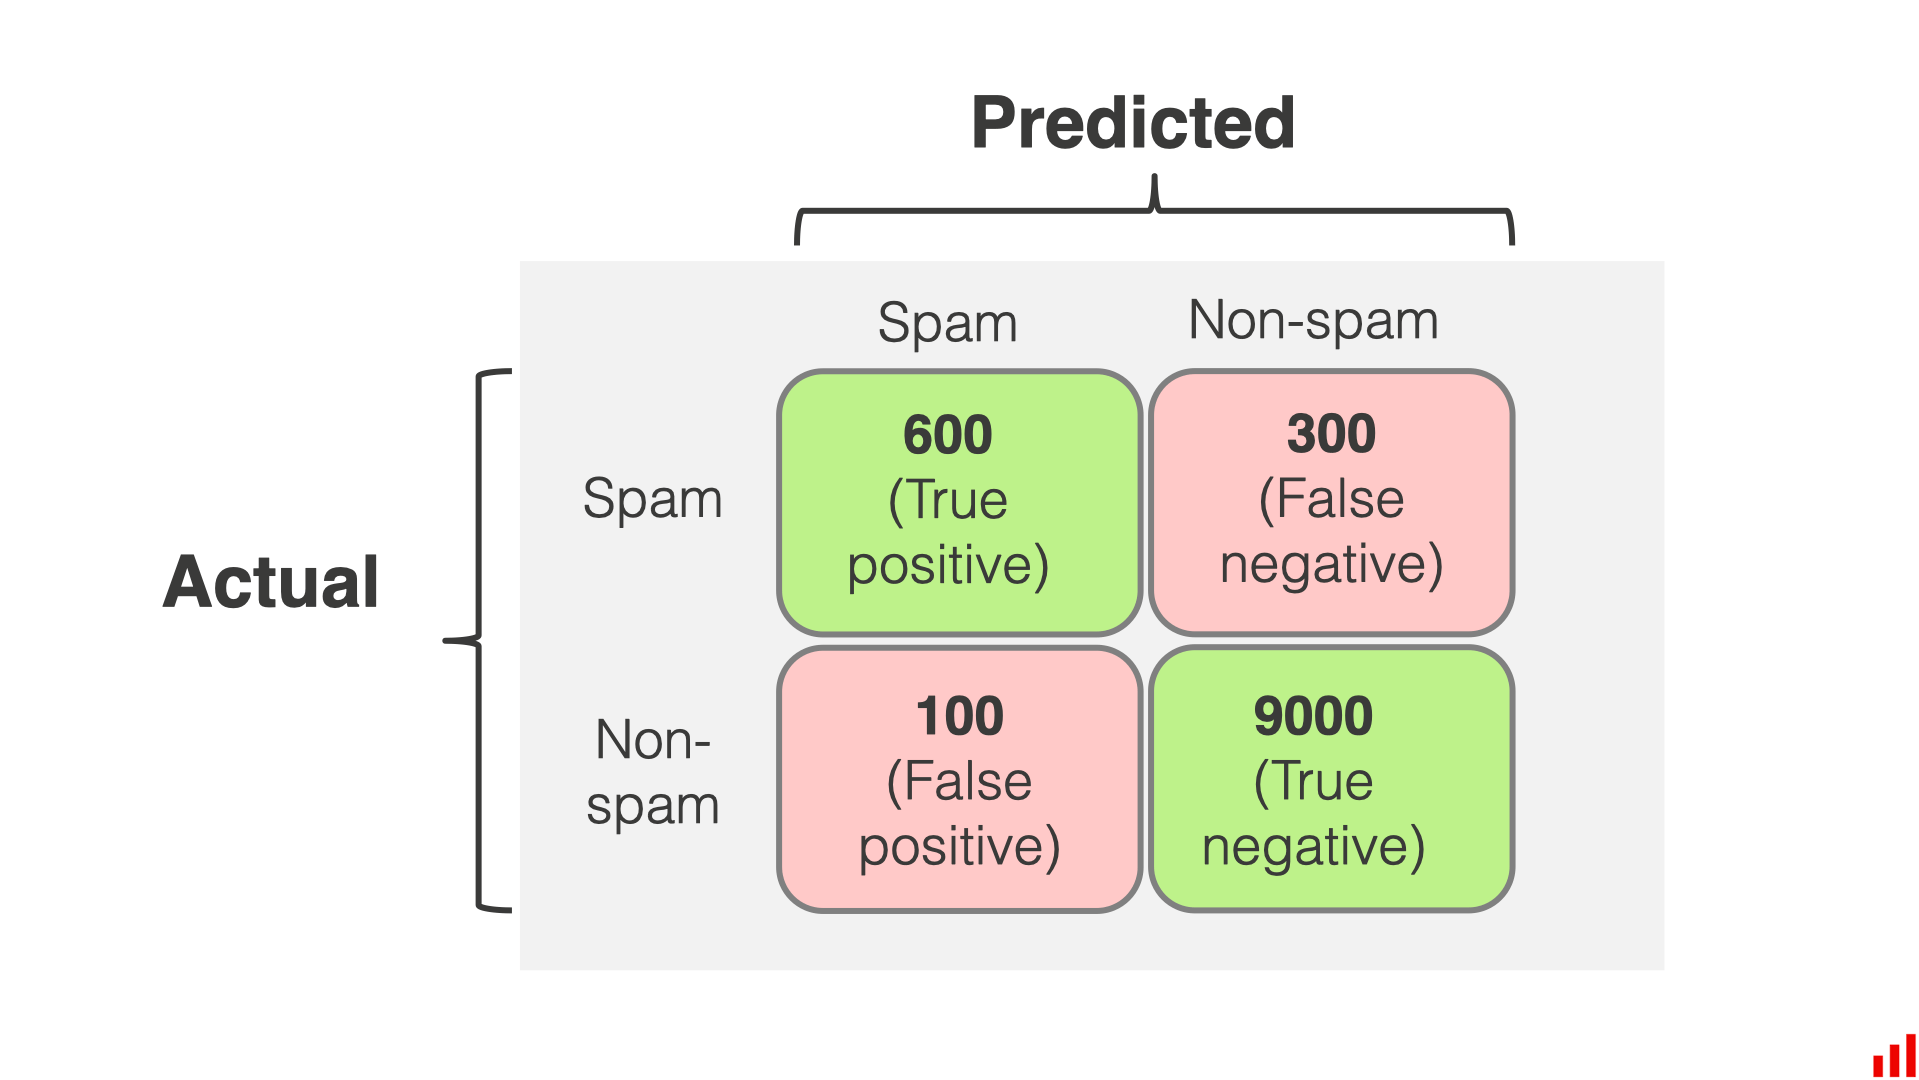

### 🎯 Simple Example:
Imagine we are building a spam detector:

- **Spam = Yes**, **Not Spam = No**
- If a spam email is correctly detected → TP
- If a real email is wrongly marked as spam → FP
- If a spam email is missed → FN
- If a real email is correctly not marked → TN

## 🧪 When TP or TN Matters More

- **Medical diagnosis (e.g., cancer detection):**
    - False Negative (FN) is *dangerous* → Missing a cancer patient
    - So, **TP is more important**

- **Spam Detection / Fraud detection:**
    - False Positive (FP) is bad → Real user is blocked or flagged
    - So, **TN is more important**

## 🔧 Titanic Dataset: Logistic Regression, KNN, Random Forest

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load dataset
data = sns.load_dataset('titanic')
data = data[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# Preprocessing
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'])

# Train-test split
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n🔍 Confusion Matrix for {name}:")
    print(cm)
    print(classification_report(y_test, y_pred))
    results[name] = (model, y_pred)

/tmp/ipython-input-1-2946328156.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
/tmp/ipython-input-1-2946328156.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr


🔍 Confusion Matrix for Logistic Regression:
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


🔍 Confusion Matrix for KNN:
[[87 18]
 [35 39]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       105
           1       0.68      0.53      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179


🔍 Confusion Matrix for Random Forest:
[[89 16]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy

### 📊 Interpretation of Results

- **Logistic Regression**:
  - Precision and recall are balanced
  - F1 Score around **0.76–0.84**, accuracy **81%**
  - A good general-purpose model

- **KNN**:
  - Slightly lower performance
  - Recall for class 1 is **53%**, meaning it misses many positives (survivors)
  - F1 Score drops to **~0.60**, accuracy **70%**

- **Random Forest**:
  - Performs similarly to Logistic Regression
  - Slightly better recall for class 1 and balanced precision
  - Accuracy **81%**, strong F1 Score balance

**Takeaway:** Logistic Regression and Random Forest are both good choices here. KNN may underperform due to sensitivity to scaling and distance in sparse Titanic data.

In [ ]:
TP=60 , Fp=100 ,FN=40 ,Precision = 60 / (100+60) , Recall = Tp/(Tp+Fn)= 60/100 = 0.6

## 🎯 Precision and Recall
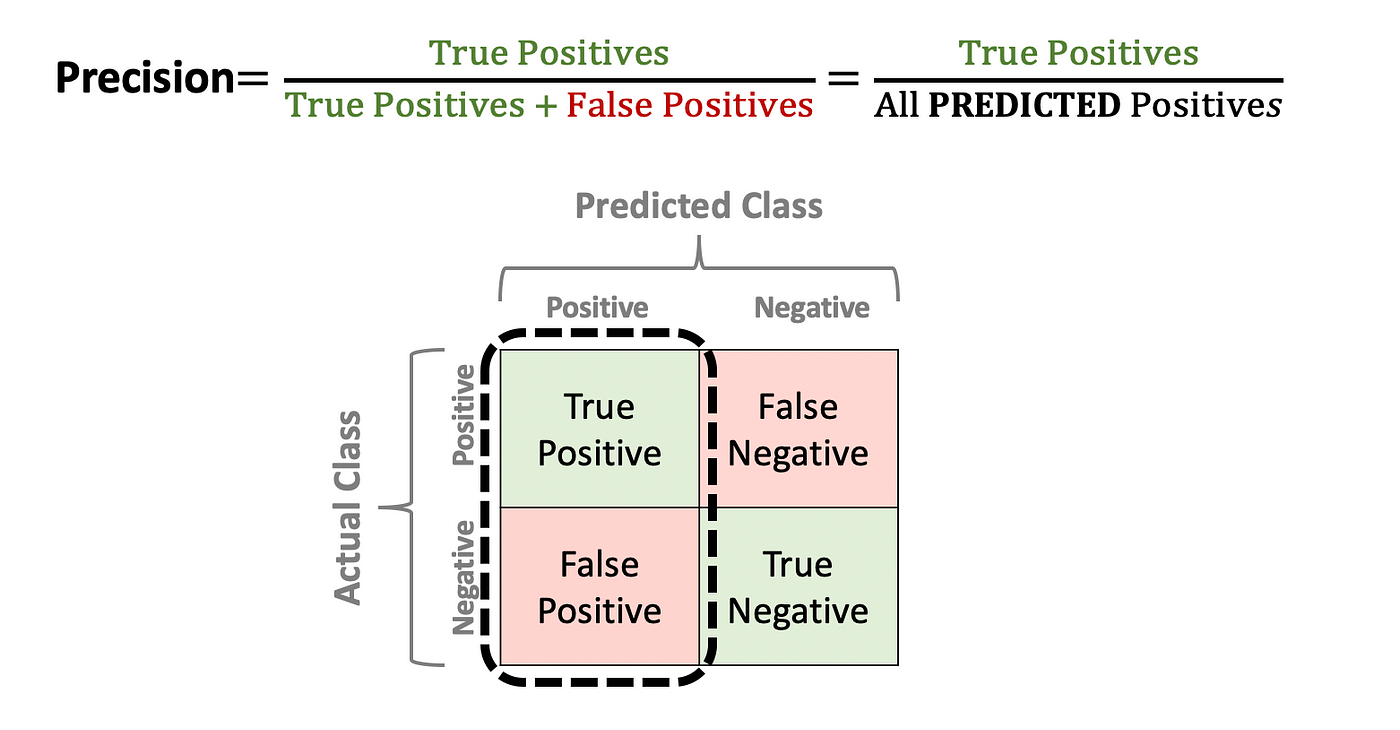

- **Precision** = TP / (TP + FP)
  - Out of all predicted positive, how many are actually correct?
- **Recall** = TP / (TP + FN)
  - Out of all actual positive, how many did we catch?

  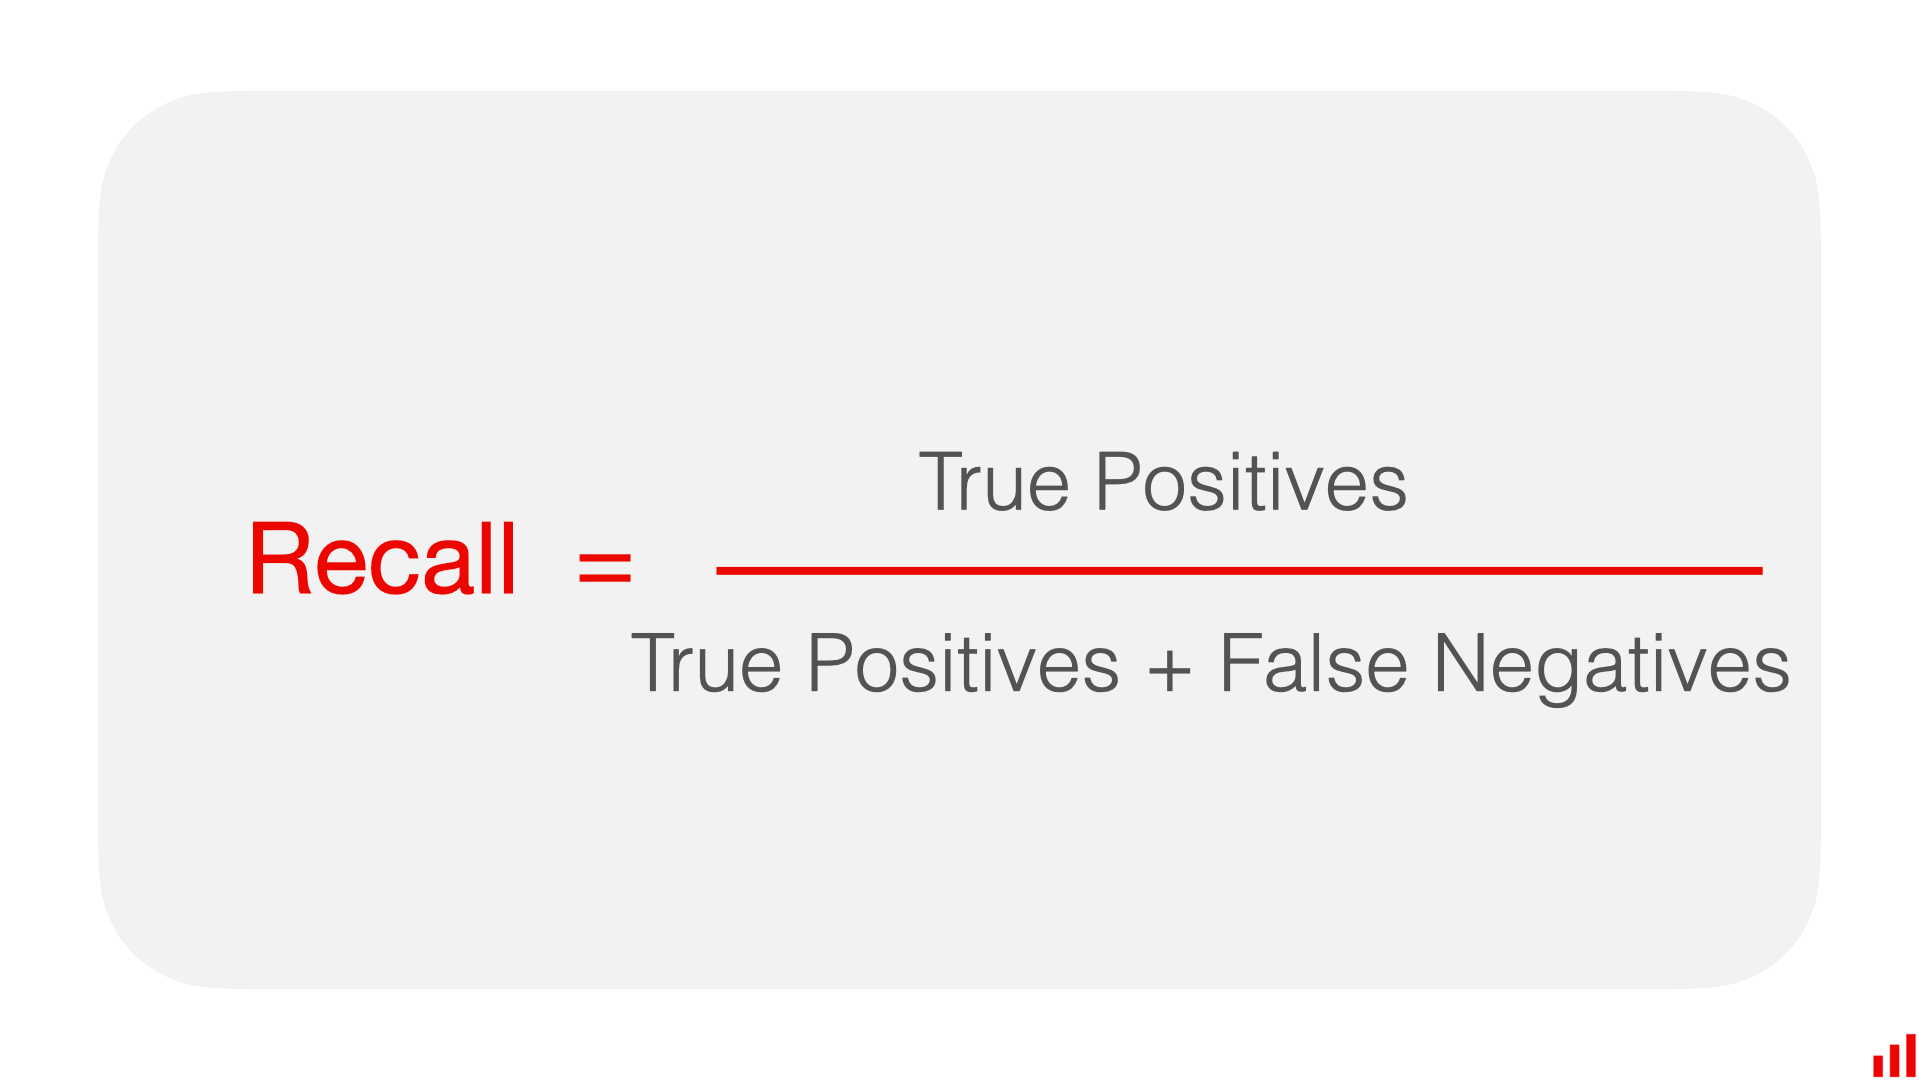

### Example:
- High Precision = Less false alarms
- High Recall = We catch most of the real positives

## ⚖️ Accuracy vs Precision/Recall

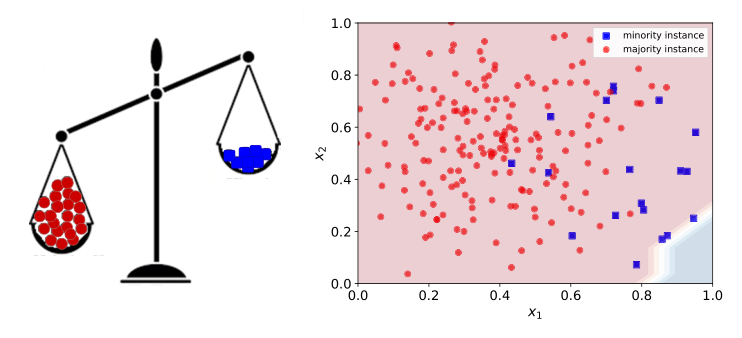

- When classes are imbalanced (e.g., 90% not spam, 10% spam), **accuracy can lie!**
- A model predicting everything as not spam will still have 90% accuracy, but 0 recall for spam
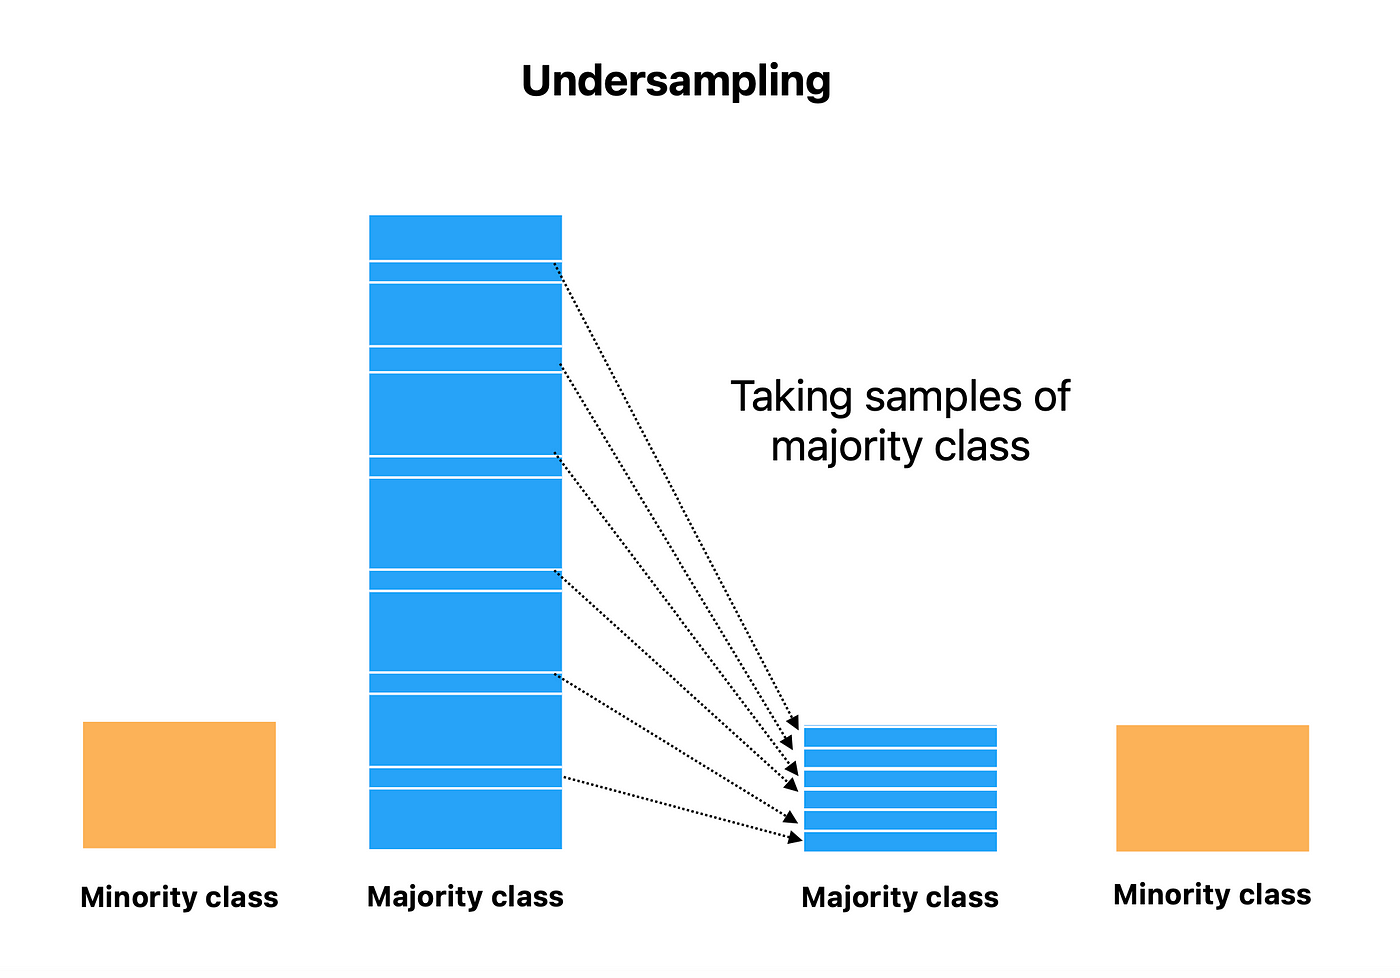


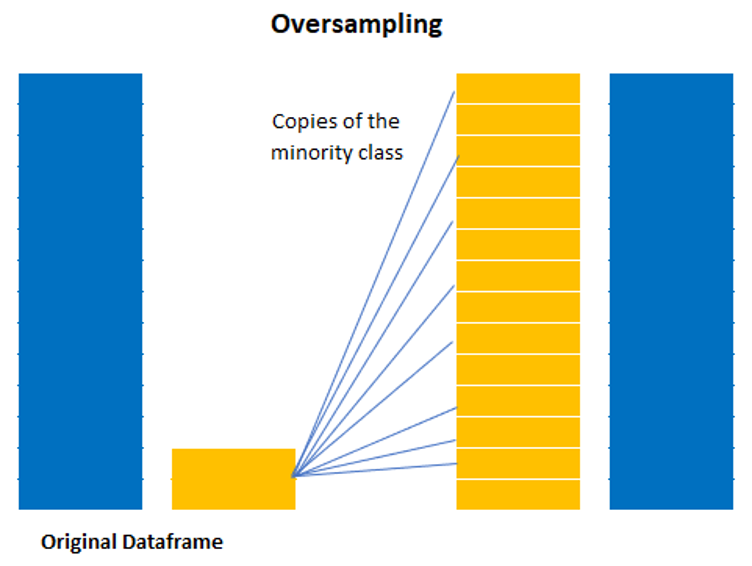

## 🏆 F1 Score: Balance Precision & Recall

0ef9c82f-2857-446e-918d-5f654b9d9133_Screenshot+(49).avif

- **F1 Score** = 2 × (Precision × Recall) / (Precision + Recall)
- Good when you want a **balance** between precision and recall
- Important in medical, fraud, risk domains

## 📈 ROC Curve and AUC

- ROC = Receiver Operating Characteristic Curve
- Plots **True Positive Rate vs False Positive Rate**

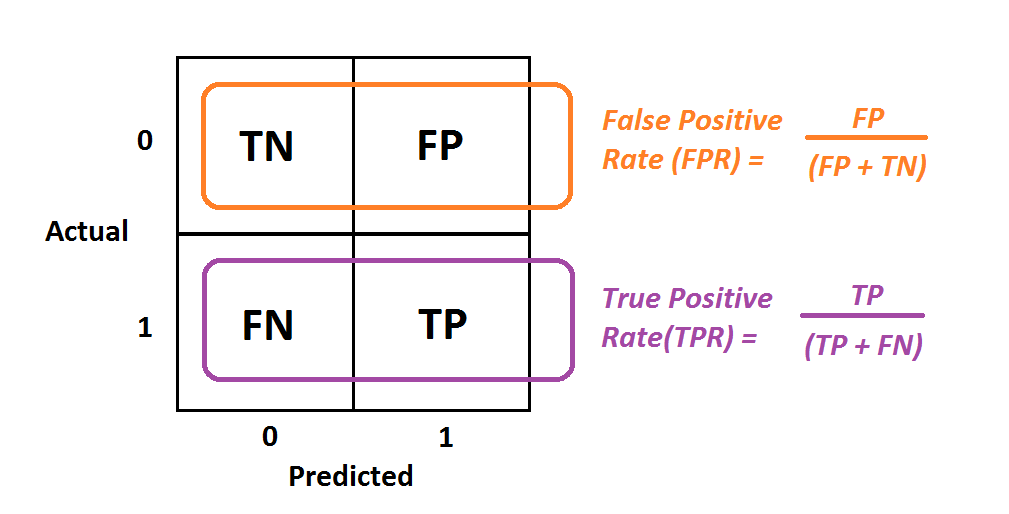

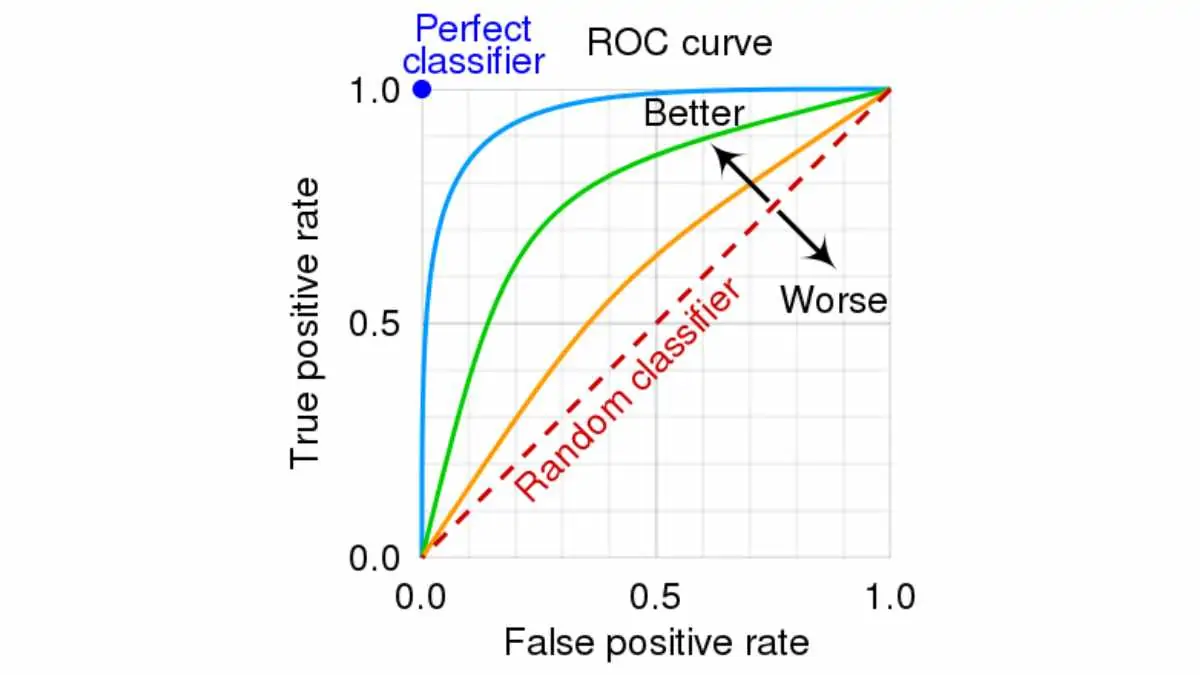

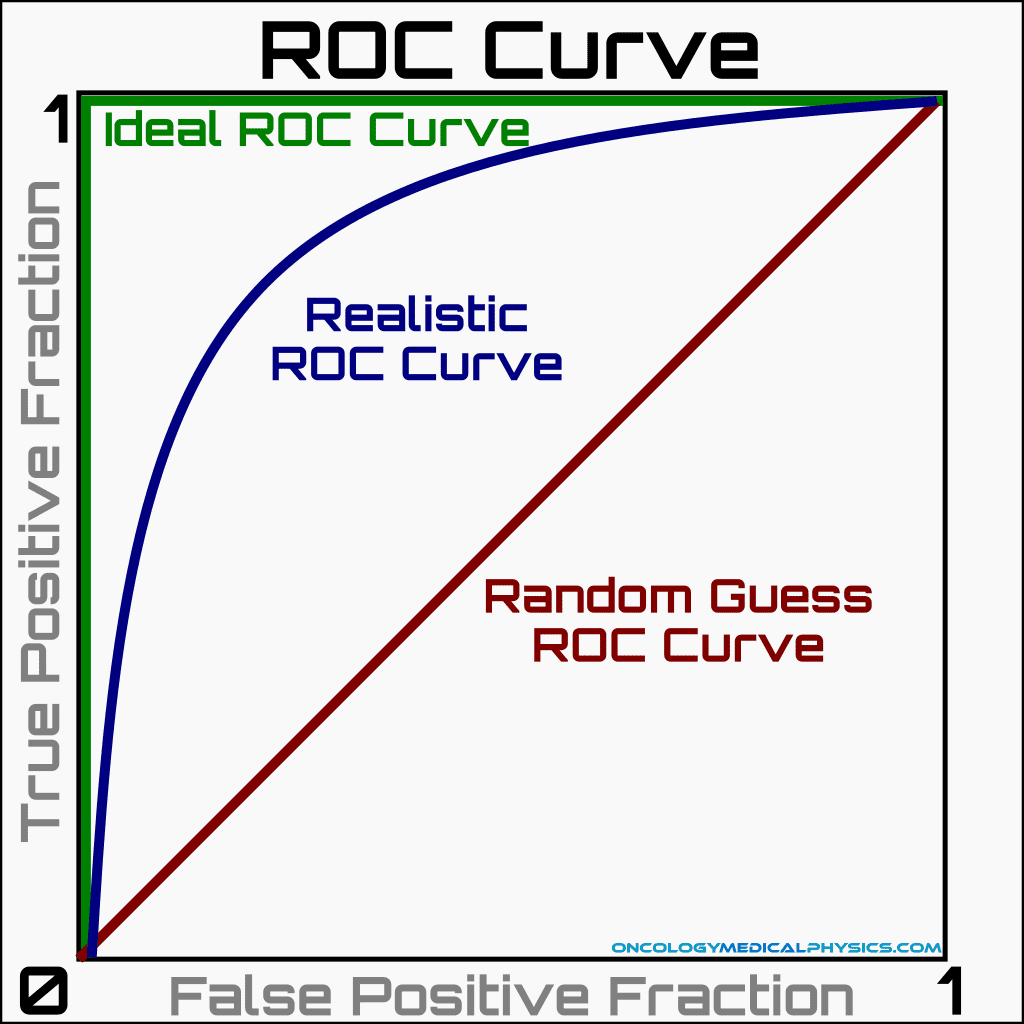

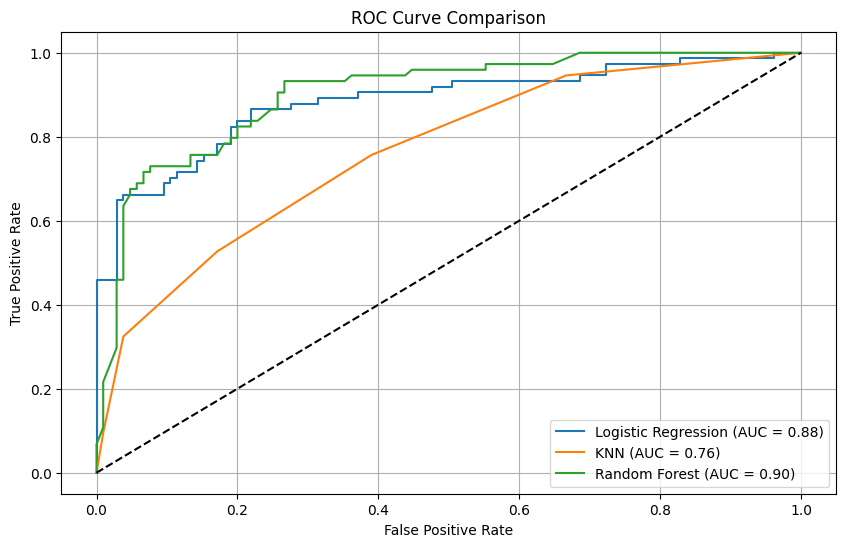

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, (model, _) in results.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

Different problems require different evaluation strategies. Here's **why each metric fits best** in different scenarios:

| Scenario | Important Metric | Why? |
|----------|------------------|------|
| **Medical Diagnosis** | **Recall (avoid FN)** | Missing a disease (False Negative) is dangerous. Better to raise more false alarms (FP) than miss a real case. |
| **Spam Detection** | **Precision (avoid FP)** | Marking real emails as spam (False Positives) frustrates users. We want to be very sure before flagging something as spam. |
| **Balanced Task** | **F1 Score** | When both FP and FN are equally costly (e.g. Titanic survival), we need a balance between precision and recall. |
| **Marketing Campaign** | **Precision** | We'd rather send offers only to likely buyers. Sending to uninterested people (FP) wastes money. |
| **Credit Risk / Loan Default** | **ROC-AUC** | We want to assess how well the model separates risky from safe borrowers, across different thresholds. ROC-AUC gives a threshold-independent performance summary. |

> 📌 **Tip:** Choose metrics based on **the cost of making wrong decisions** in your real-world use case.


## ✅ Final Tips

- Accuracy is not always reliable — go deeper
- Visualize Confusion Matrix to debug
- Use F1 for balance, ROC-AUC for performance
- Choose metrics based on business and real-world needs

---

🎓 Happy Learning & Evaluating Models!